This Notebook will 'simply' learn to calculate a given number representing the degrees in Fahrenheit to its Celsius equivalent. 

In [2]:
#First we import numpy, tensorflow and finally matplotlib to visualise our training's loss
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Let the data's inputs consist of random numbers between -50 and 101
f_inputs = np.random.uniform(low=-50, high=101, size=(75,))
c_outputs = []

#We calculate the Fahrenheit equivalent for the expected output
for i in f_inputs:
  temp = (i - 32) * 5.0/9.0
  c_outputs.append(temp)

print(f_inputs)
print(c_outputs)

[ -4.52846963  96.43059232  36.86279555  26.31859475  34.94657755
 -19.93305465  77.60624192  36.16112267  15.6274272   29.1608095
  71.99451041  56.33463363  31.49304943  29.40342529  -4.39748342
 -20.43143025  88.87769283  77.95372731  56.50426935  20.0663338
  -2.42839098 -37.40726458 -25.88827398  94.7502074   70.88373491
  52.40444879  47.78182386  98.33732764   6.53724615  77.32375347
  -3.14514708 -41.28756249 -27.3890368   87.69500959  52.86937297
   2.05935941  55.01290469  10.60820611  -6.44997996 -36.33420098
  51.95167819 -49.91285928 -18.70476219 -34.21295499 -36.46822046
 -13.11963934  53.47838905 -32.31538239 -36.50053509 -36.67095121
 -19.80160587   7.22492541  52.63595706  47.08473088  53.42402039
  74.22836955 -20.95536345  -3.8677176   37.76446939  49.75794759
  27.93508732 -27.77298948  44.61428042  58.27344341  85.47949636
 -31.49308627 -44.17179512  -1.45092164  25.31644376  71.52829265
 -12.13113445  35.29785593  88.35123252  42.85660001  27.8818189 ]
[-20.293594

I am pretty happy with how those numbers look. For example, I get -4.52846963 (F) as -20.293594237137746 (C), which is correct.

In [57]:
#We convert our datasets now to np.arrays for optimum usage. They are much more memory efficient, they don't call other Python objects
#The added bonus is that we get access to matrix and vector functions built-in
f_inputs_np = np.array(f_inputs, dtype=float)
c_outputs_np = np.array(c_outputs, dtype=float)

#We're using a simple 1 layered Sequential model because we have a simple 1 input and 1 output dataset
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(layer)

#The loss function is important as it will indicate how well our model above is performing. We want a low Mean Squared Error.
#Adam is a way for the model to optimize itself during training where it looks to see how close its guess is to what is expected.
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
#Fit does the actual training and does it for the number of epochs (sounds epic, just means iterations)
history = model.fit(f_inputs_np, c_outputs_np, epochs=500, verbose=False)
print("Finished training")

Finished training


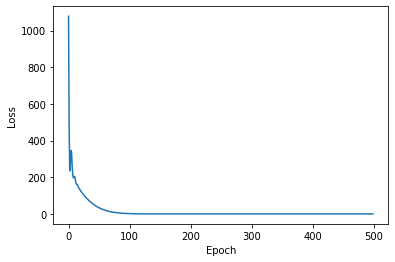

In [58]:
#Let's have a look at how we did on our training
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

Pretty good we're getting very close to 0 in our loss.

In [60]:
#Let's do a prediction on our model. One of my favourites is -40 because it's the same in Celsius and Fahrenheit
print(model.predict([-40.0]))

[[-39.99996]]


In [61]:
#I had a look at 32 Fahrenheit because that is 0
print(model.predict([32.0]))

[[1.5258789e-05]]


In [62]:
print(model.weights)

[<tf.Variable 'dense_19/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5555552]], dtype=float32)>, <tf.Variable 'dense_19/bias:0' shape=(1,) dtype=float32, numpy=array([-17.777752], dtype=float32)>]
